In [1]:
from aeon.classification.interval_based import QUANTClassifier
from aeon.regression.interval_based import QUANTRegressor
from aeon.datasets import load_gunpoint
from aeon.datasets import load_from_ts_file
from aeon.datasets import load_basic_motions
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import qgap

In [2]:
'''modelC = QUANTClassifier(estimator=RandomForestClassifier)
modelR = QUANTRegressor(estimator=RandomForestRegressor)
modelMC = QUANTClassifier(estimator=RandomForestClassifier)'''

'modelC = QUANTClassifier(estimator=RandomForestClassifier)\nmodelR = QUANTRegressor(estimator=RandomForestRegressor)\nmodelMC = QUANTClassifier(estimator=RandomForestClassifier)'

In [3]:
XtrainC, ytrainC = load_gunpoint(split="TRAIN")
#Xtest1, ytest1 = load_gunpoint(split="TEST")

XtrainMC, ytrainMC = load_basic_motions(split="TRAIN")

In [4]:
qfgapC = qgap.QGAP(matrix_type="dense")
qfgapR = qgap.QGAP(prediction_type="regression", matrix_type="dense")
qfgapMC = qgap.QGAP(matrix_type="dense")



In [5]:
qfgapC.fit(XtrainC,ytrainC)
Pc = qfgapC.get_proximities()
print(Pc.shape)

(50, 50)


In [6]:
qfgapMC.fit(XtrainMC,ytrainMC)
Pmc = qfgapMC.get_proximities()
print(Pmc.shape)

(40, 40)


# Using Transformer to Add Static Labels

In [10]:
from aeon.transformations.collection.interval_based import QUANTTransformer as QT
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.path.abspath('..'))
from helpers import *
import pandas as pd

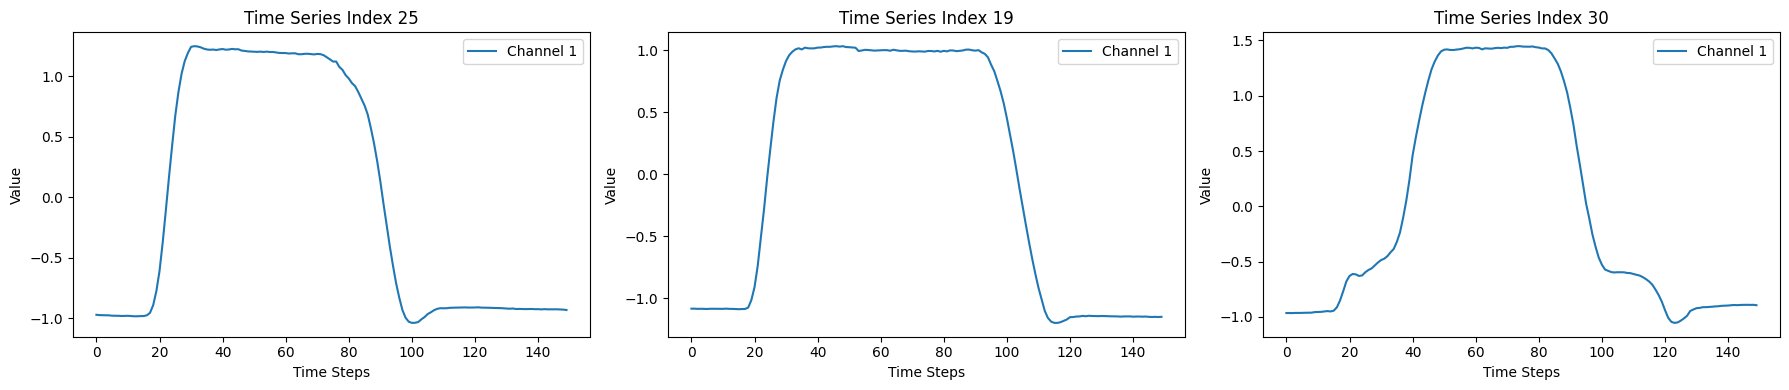

In [11]:
plot_random_time_series(XtrainC, None, 3)

In [12]:
# Fit and transform the time series
qt = QT()
qt.fit(XtrainC)
Xt = qt.transform(XtrainC)
print(Xt.shape), print(XtrainC.shape) # So we expanded our fifty time series into 1556 different features

(50, 1556)
(50, 1, 150)


(None, None)

In [13]:
pd.DataFrame(Xt).sample(3)

,0,1,2,3,4,5,6,7,8,9,...,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555
19,-1.197083,-1.180350,-1.150315,-1.148337,-1.146618,-1.145609,-1.144835,-1.143492,-1.141992,-1.130156,...,0.025703,0.062034,0.074707,0.008471,0.045166,0.038682,0.037191,0.055745,0.029254,0.030009
36,-1.313780,-1.307630,-1.304117,-1.299783,-1.293460,-1.286390,-1.221709,-1.214132,-1.203237,-1.199166,...,0.190620,0.162597,0.180934,0.141630,0.115420,0.204617,0.243942,0.248215,0.209321,0.466194
24,-0.716838,-0.710094,-0.709833,-0.709046,-0.708436,-0.707558,-0.703667,-0.699268,-0.659630,-0.653614,...,0.121247,0.090311,0.082277,0.073115,0.100372,0.096236,0.081333,0.087034,0.081777,0.084560


In [14]:
# Create random static variables to append to the dataframe
Xstatic = np.random.rand(Xt.shape[0], 45)
X = np.hstack([Xt, Xstatic])
X.shape

(50, 1601)

In [15]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights for classification based on ytrainC
sample_weights = compute_sample_weight(class_weight='balanced', y=ytrainC)

# Create and train the Random Forest using the sample weights
rf_model = RandomForestClassifier()
rf_model.fit(X, ytrainC, sample_weight=sample_weights)

RandomForestClassifier()

In [16]:
rf_model.feature_importances_.max()

np.float64(0.044231891507459806)

In [17]:
rf_model.predict(X)

array(['2', '2', '1', '1', '2', '2', '2', '2', '2', '1', '1', '1', '1',
       '1', '2', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '2',
       '1', '1', '2', '1', '1', '2', '2', '1', '2', '1', '2', '2', '2',
       '2', '2', '1', '1', '1', '2', '2', '1', '2', '1', '2'], dtype='<U1')

## Qgap tests with static variables

In [18]:
qfgapC = qgap.QGAP(matrix_type="dense")

qfgapC.fit(XtrainC,ytrainC, static = Xstatic)
Pc = qfgapC.get_proximities()
print(Pc.shape)

(50, 50)
